# Python For Data Analysis : Final Project
## spambase dataset : Adam DOBOSZ, Maxime JULLIEN, Othman SEQQAT

In [2]:
## Importing dataset

In [1]:
import pandas as pd
import numpy as np

with open('spambase/spambase.names','r') as f:
    features = []
    for line in f.readlines()[33:]:
        features.append(line.split(':')[0])
    features.append('spam')
    f.close()

spambase_df = pd.read_csv('spambase/spambase.data', names=features)

* #### lets take a look on our Data Frame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
spambase_df.head(3)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1


In [4]:
print(f"Shape of the original spambase Data Frame : {spambase_df.shape}")

Shape of the original spambase Data Frame : (4601, 58)


* Lets see how much spams are on this dataset

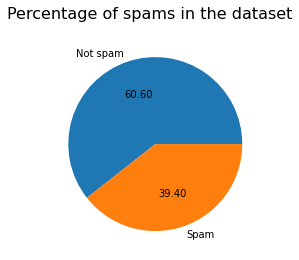

In [12]:
spam_prctg_df = spambase_df.spam.value_counts(normalize=True).to_frame()

plt.figure()
plt.pie(spam_prctg_df['spam'], labels=['Not spam', 'Spam'], autopct='%.2f')
plt.suptitle("Percentage of spams in the dataset", fontsize=16)

plt.show()

* lets see the columns type

In [10]:
spambase_df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

* Lets verify if there is any null values

In [11]:
spambase_df.isnull().values.any()

False

* Lets have some informations on our features  

In [12]:
spambase_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


* Correlation matrix

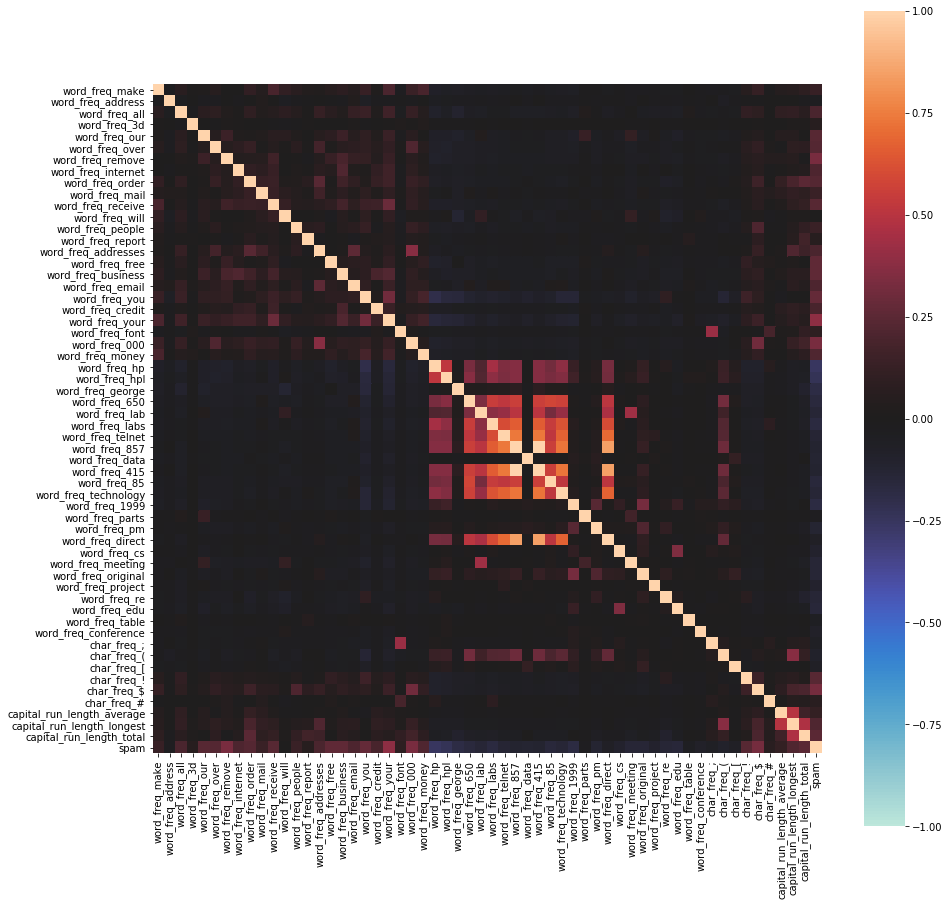

In [28]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(spambase_df.corr(), cmap ="icefire", vmin=-1, square=True,)

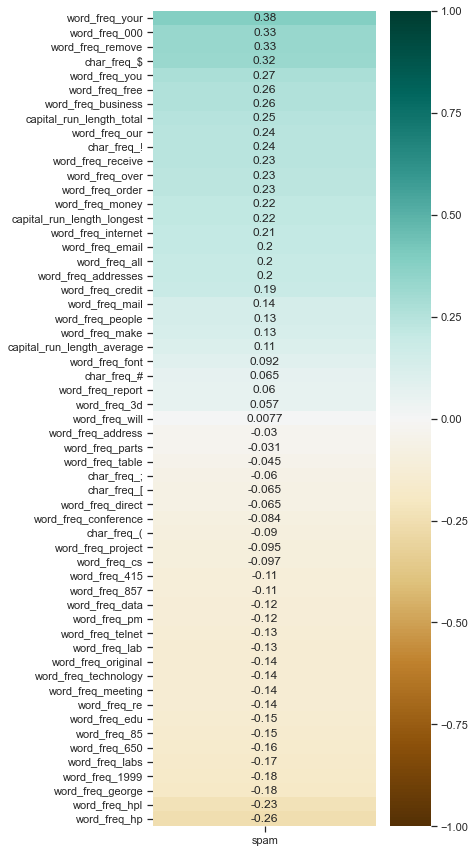

In [99]:
fig = plt.figure(figsize=(5,15))

corr_spam = spambase_df.corr()[["spam"]].sort_values(by="spam",ascending=False)
corr_spam.drop('spam',inplace=True)

heatmap = sns.heatmap(corr_spam, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [93]:
spambase_df.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604
word_freq_remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344,0.332117
word_freq_internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252,0.206808
word_freq_order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724,0.231551
word_freq_mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273,0.138962


* lets plot the frequency of special characters in a spam mail

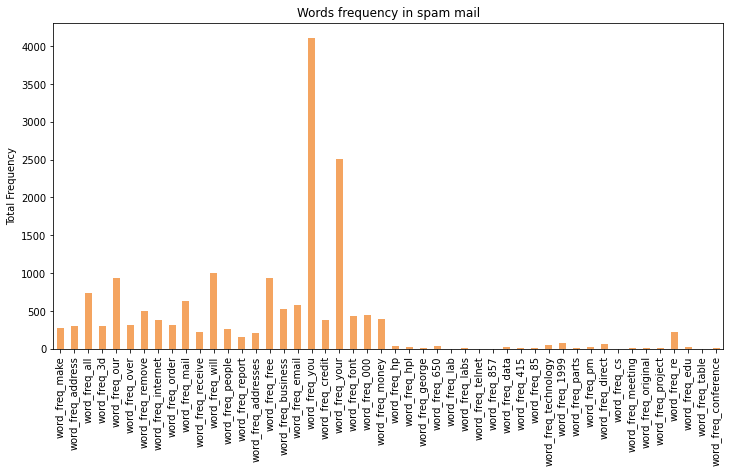

In [40]:
fig = plt.figure(figsize=(12,6))
spambase_df[spambase_df['spam']==1].iloc[:,0:48].sum().plot(kind='bar', color='sandybrown')
plt.title("Words frequency in spam mail")
x_ticks_label =[x for x in spambase_df.columns[0:48]]
plt.ylabel('Total Frequency')
plt.xticks(np.arange(48),x_ticks_label)
plt.show()

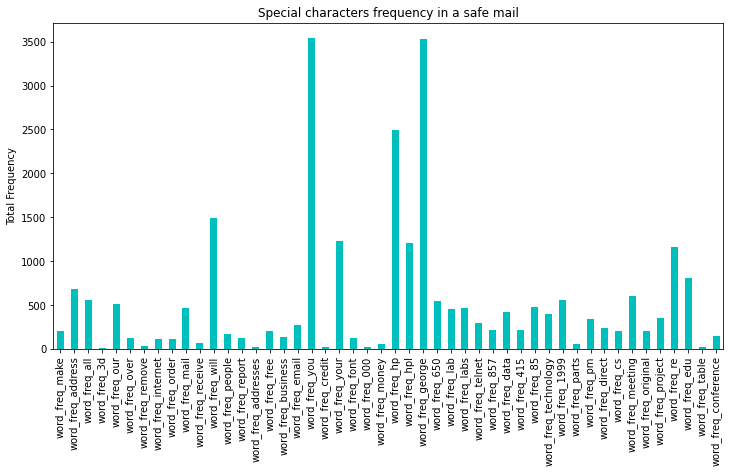

In [41]:
fig = plt.figure(figsize=(12,6))
spambase_df[spambase_df['spam']==0].iloc[:,0:48].sum().plot(kind='bar', color='c')
plt.title("Special characters frequency in a safe mail")
x_ticks_label =[x for x in spambase_df.columns[0:48]]
plt.ylabel('Total Frequency')
plt.xticks(np.arange(48),x_ticks_label)
plt.show()

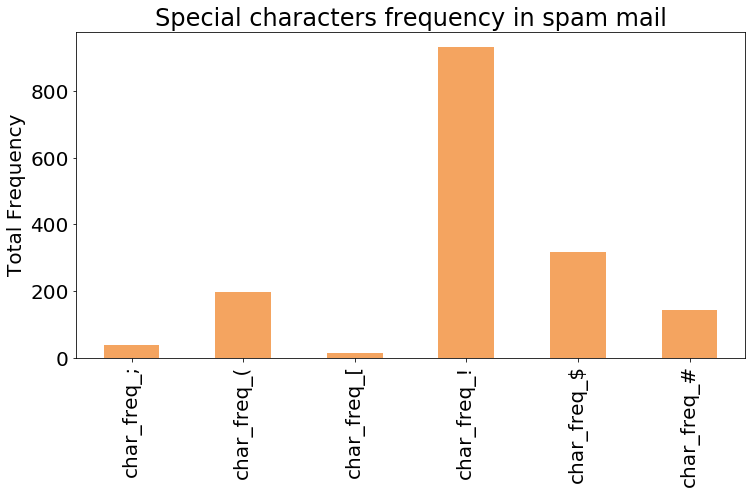

In [47]:
fig = plt.figure(figsize=(12,6))
spambase_df[spambase_df['spam']==1].iloc[:,48:54].sum().plot(kind='bar', color='sandybrown')
plt.title("Special characters frequency in spam mail")
x_ticks_label =[x for x in spambase_df.columns[48:54]]
plt.ylabel('Total Frequency')
plt.xticks(np.arange(54-48),x_ticks_label)
plt.show()

* lets plot the frequency of special characters in a safe mail

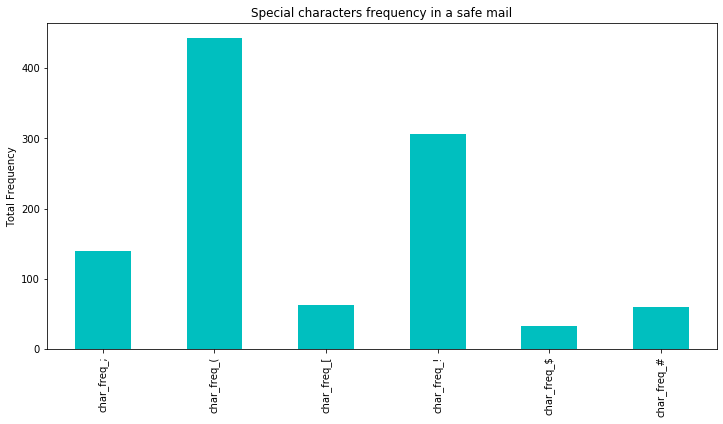

In [43]:
fig = plt.figure(figsize=(12,6))
spambase_df[spambase_df['spam']==0].iloc[:,48:54].sum().plot(kind='bar', color='c')
plt.title("Special characters frequency in a safe mail")
x_ticks_label =[x for x in spambase_df.columns[48:54]]
plt.ylabel('Total Frequency')
plt.xticks(np.arange(54-48),x_ticks_label)
plt.show()

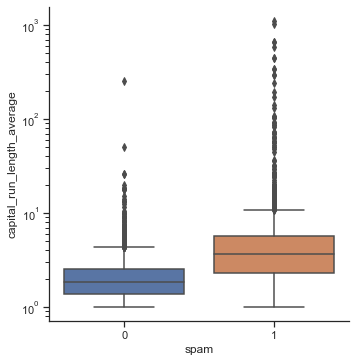

In [81]:
g = sns.catplot(x="spam", y="capital_run_length_average", kind="box",
            data=spambase_df.sort_values("spam"))
g.set(yscale="log")

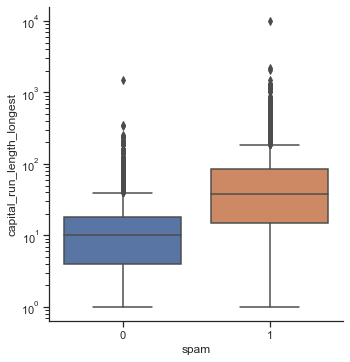

In [82]:
g = sns.catplot(x="spam", y="capital_run_length_longest", kind="box",
            data=spambase_df.sort_values("spam"))
g.set(yscale="log")

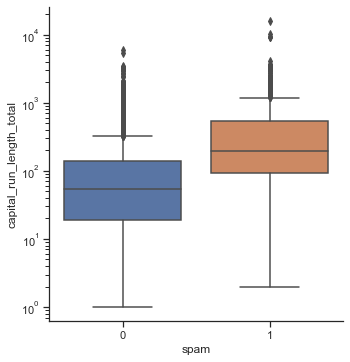

In [83]:
g = sns.catplot(x="spam", y="capital_run_length_total", kind="box",
            data=spambase_df.sort_values("spam"))
g.set(yscale="log")

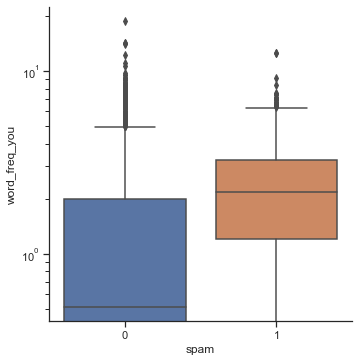

In [85]:
g = sns.catplot(x="spam", y="word_freq_you", kind="box",
            data=spambase_df.sort_values("spam"))
g.set(yscale="log")

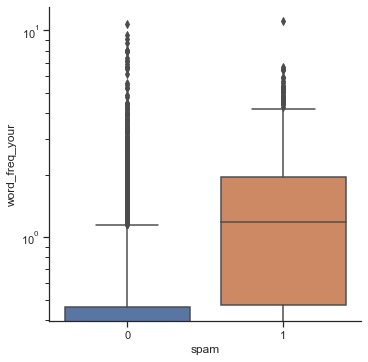

In [86]:
g = sns.catplot(x="spam", y="word_freq_your", kind="box",
            data=spambase_df.sort_values("spam"))
g.set(yscale="log")

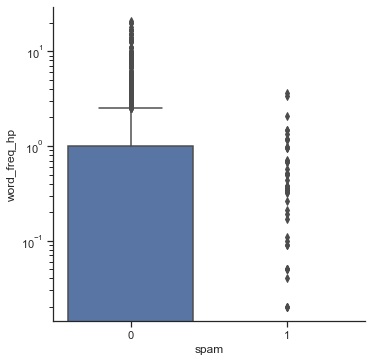

In [87]:
g = sns.catplot(x="spam", y="word_freq_hp", kind="box",
            data=spambase_df.sort_values("spam"))
g.set(yscale="log")

In [50]:
capital_run_length_average    float64
capital_run_length_longest      int64
capital_run_length_total     

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: spam, Length: 4601, dtype: int64

## Setting up a train dataset and a test dataset

In [39]:
from sklearn.model_selection import train_test_split

X = spambase_df.iloc[:,:-1]     # Removing the spam column from the original dataset
Y = spambase_df.spam            # choosing only the spam column from the dataset

# Splitting : we're train with 75% and keep 25% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

print(f"Shape of the train data values : {X_train.shape}")
print(f"Shape of the test data values : {X_test.shape}\n")

print(f"Shape of the train label values : {Y_train.shape}")
print(f"Shape of the test label values :  {Y_test.shape}")

Shape of the train data values : (3450, 57)
Shape of the test data values : (1151, 57)

Shape of the train label values : (3450,)
Shape of the test label values :  (1151,)


## Machine Learning models:
We are going to use these models:
* ### Linear Discriminant Analysis
* ### Logistic Regression
* ### Gradient Boosting Classifier
* ### Random Forest Classifier

* Lets import the models from scikit-learn 

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [41]:
# Please set the number of decimals you want in your scores
p = 5

* Lets fit the models
### Linear Discriminant Analysis

In [42]:
lda = LDA(n_components=1)

lda.fit_transform(X_train, Y_train)
lda.transform(X_test)

print(f"The Linear Discriminant Analysis score on train dataset : {round(lda.score(X_train, Y_train), p)}")
print(f"The Linear Discriminant Analysis score on test dataset : {round(lda.score(X_test, Y_test), p)}")


The Linear Discriminant Analysis score on train dataset : 0.89217
The Linear Discriminant Analysis score on test dataset : 0.90443


### Logistic Regression

In [43]:
logReg = LogisticRegression(max_iter= 3000, random_state=10)
logReg.fit(X_train, Y_train)

print(f"The Logistic Regression score on train dataset : {round(logReg.score(X_train, Y_train), p)}")
print(f"The Logistic Regression score on test dataset : {round(logReg.score(X_test, Y_test), p)}")

The Logistic Regression score on train dataset : 0.93275
The Logistic Regression score on test dataset : 0.93658


### Gradient Boosting Classifier

In [44]:
gradBoost = GradientBoostingClassifier(random_state=10)
gradBoost.fit(X_train, Y_train)

print(f"The Gradient Boosting Classifier on train dataset : {round(gradBoost.score(X_train, Y_train), p)}")
print(f"The Gradient Boosting Classifier on test dataset : {round(gradBoost.score(X_test, Y_test), p)}")

The Gradient Boosting Classifier on train dataset : 0.96464
The Gradient Boosting Classifier on test dataset : 0.95135


### Random Forest Classifier

In [45]:
randForest = RandomForestClassifier(random_state=10)
randForest.fit(X_train, Y_train)

print(f"The Random Forest Classifier on train dataset : {round(randForest.score(X_train, Y_train), p)}")
print(f"The Random Forest Classifier on test dataset : {round(randForest.score(X_test, Y_test), p)}")

The Random Forest Classifier on train dataset : 0.99942
The Random Forest Classifier on test dataset : 0.9583


In [46]:
randForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

* #### Lets create a dictionnary for these models

In [47]:
models = {"lda": {"name" : "Linear Discriminant Analysis", "model": lda, "test_score": round(lda.score(X_test, Y_test), p)},
"logReg": {"name" : "Logistic Regression","model": logReg, "test_score": round(logReg.score(X_test, Y_test), p)},
"gradBoost": {"name" : "Gradient Boosting Classifier","model": gradBoost, "test_score": round(gradBoost.score(X_test, Y_test), p)},
"randForest": {"name" : "Random Forest Classifier","model": randForest, "test_score": round(randForest.score(X_test, Y_test), p)}}

### Comparing these Machine Learning models on this dataset 

* #### We make a prediction for each model from the previous ones, then we find out it's precision

In [48]:
# Importing the accuracy and the precision functions
from sklearn.metrics import accuracy_score, precision_score

In [49]:
for model in models:
    Y_pred = eval(model).predict(X_test)
    models[model].update({'accuracy': round(accuracy_score(Y_test, Y_pred), p)})
    models[model].update({'precision': round(precision_score(Y_test, Y_pred), p)})

* #### Lets print the scores for each model to make comparisons between them

In [50]:
comparison_df = pd.DataFrame(data=zip([models[model]['name'] for model in models],
 [models[model]['accuracy'] for model in models],
 [models[model]['precision'] for model in models]),
 columns=['model', 'accuracy', 'precision'])

comparison_df.sort_values(by=['precision'], ascending=False)

,model,accuracy,precision
3,Random Forest Classifier,0.95830,0.94725
2,Gradient Boosting Classifier,0.95135,0.94419
1,Logistic Regression,0.93658,0.92148
0,Linear Discriminant Analysis,0.90443,0.91837


We can see the most precise model from what we did is the : Random Forest Classifier

Lets do some tunning to improve the random forest prediction. 

In [51]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [False]}


In [52]:
forest = RandomForestClassifier(random_state=10)

rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=10, n_jobs = -1, refit='precision')
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=10, refit='precision', verbose=2)

In [53]:
param = rf_random.best_params_
param

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [54]:
best_randForest = RandomForestClassifier(random_state=10, max_depth=30, n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=False)
best_randForest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       n_estimators=1800, random_state=10)

In [55]:
precision_score(Y_test, best_randForest.predict(X_test))

0.9473684210526315

In [72]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [30, 60, 80, 100],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [1000, 1800, 2000]
}


In [79]:
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf,  refit = 'precision', param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [30, 60, 80, 100],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [1000, 1800, 2000]},
             refit='precision', verbose=2)

In [80]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1800}

In [81]:
best_randForest_Grid = RandomForestClassifier(random_state=10, max_depth=30, n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=False)
best_randForest_Grid.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       n_estimators=1800, random_state=10)

In [82]:
precision_score(Y_test, best_randForest_Grid.predict(X_test))

0.9473684210526315

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, randForest.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot(cmap='Blues')

NameError: name 'clf' is not defined

## Exporting our model

In [87]:
import joblib

filename = "randForest.pkl"
joblib.dump(randForest, filename)

['randForest.pkl']